In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('Titanic-Dataset.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


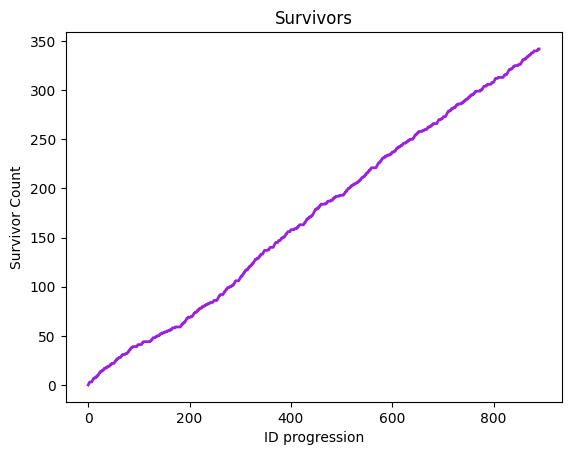

In [30]:
x = range(891)
y = []
i=0
for survived in df['Survived']:
  if(survived == 1): i+=1
  y.append(i)

plt.plot(x, y, color='#9a22dd', linestyle='-', linewidth=2, markersize=5)

plt.title('Survivors')
plt.xlabel('ID progression')
plt.ylabel('Survivor Count')

plt.show()


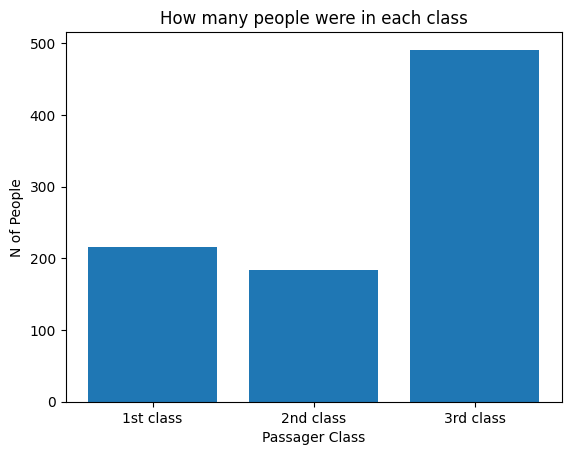

In [31]:
categories = [1, 2, 3]
values = [0, 0, 0]

for pclass in df['Pclass']:
  values[categories.index(pclass)] += 1

p_class = ['1st class', '2nd class', '3rd class']

plt.bar(p_class, values)

plt.xlabel('Passager Class')
plt.ylabel('N of People')
plt.title('How many people were in each class')

plt.show()

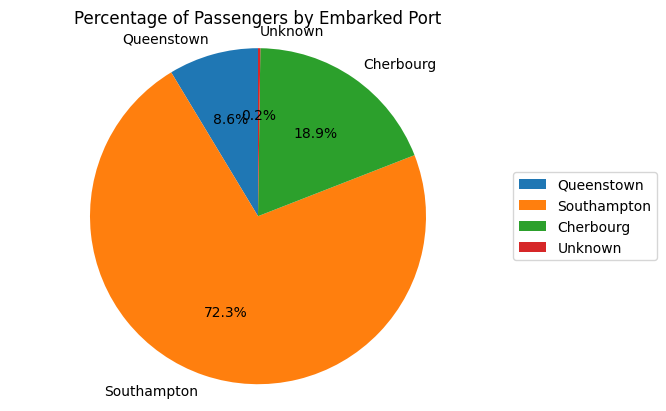

In [32]:
categories = ['Q', 'S', 'C']
values = [0, 0, 0, 0]

for port in df['Embarked']:
  if(pd.isna(port)): values[-1] += 1
  else: values[categories.index(port)] += 1

labels = ['Queenstown', 'Southampton', 'Cherbourg', 'Unknown']

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Percentage of Passengers by Embarked Port')

plt.axis('equal')

plt.legend(labels=labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

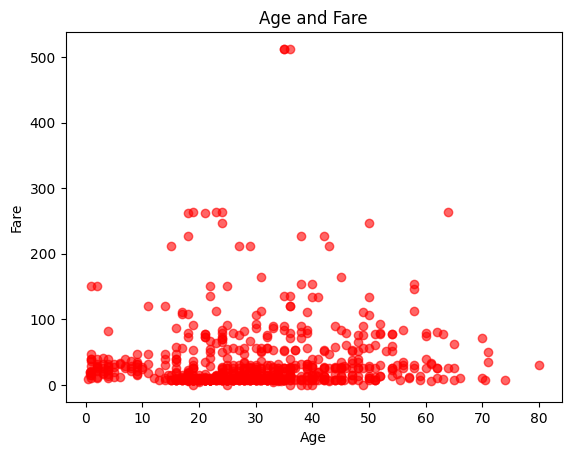

In [33]:
x = []
y = []

for index, person in df.iterrows():
  if(not pd.isna(person['Age'])):
    x.append(person['Age'])
    y.append(person['Fare'])

plt.scatter(x, y, color='red', marker='o', alpha=0.6)

plt.title('Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()


In [34]:
categories = [1, 2, 3]
values = [0, 0, 0]
total = [0,0,0]

for _, person in df.iterrows():
  total[categories.index(person['Pclass'])] += 1
  if(person['Survived']==1): values[categories.index(person['Pclass'])] += 1

for i in range(len(values)):
  values[i] = values[i]/total[i] * 100

p_class = ['1st class', '2nd class', '3rd class']

for i in range(len(values)):
  print(f'{p_class[i]} survival rate: {values[i]}%')

1st class survival rate: 62.96296296296296%
2nd class survival rate: 47.28260869565217%
3rd class survival rate: 24.236252545824847%


In [35]:
categories = ['male', 'female']
values = [0, 0]
total = [0,0]

for _, person in df.iterrows():
  total[categories.index(person['Sex'])] += 1
  if(person['Survived']==1): values[categories.index(person['Sex'])] += 1

for i in range(len(values)):
  values[i] = values[i]/total[i] * 100

for i in range(len(values)):
  print(f'{categories[i]} survival rate: {values[i]}%')

male survival rate: 18.890814558058924%
female survival rate: 74.20382165605095%


In [36]:
df['Age'].max()

80.0

In [37]:
categories = [0, 10, 20, 30, 40, 50, 60, 70, 80]
values = [0, 0, 0, 0, 0, 0, 0, 0, 0]
total = [0, 0, 0, 0, 0, 0, 0, 0, 0]

for _, person in df.iterrows():
  if(not pd.isna(person['Age'])):
    i = int(person['Age']/10)
    total[i] += 1
    if(person['Survived']==1): values[i] += 1

for i in range(len(values)):
  if (total[i] > 0):
    values[i] = values[i]/total[i] * 100

for i in range(len(values)):
  if(total[i] == 0): print(f'{categories[i]}-{categories[i]+9}: No passenger found')
  print(f'{categories[i]}-{categories[i]+9}: survival rate: {values[i]}%')

0-9: survival rate: 61.29032258064516%
10-19: survival rate: 40.19607843137255%
20-29: survival rate: 35.0%
30-39: survival rate: 43.712574850299404%
40-49: survival rate: 38.20224719101123%
50-59: survival rate: 41.66666666666667%
60-69: survival rate: 31.57894736842105%
70-79: survival rate: 0.0%
80-89: survival rate: 100.0%
